## **Import libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import gdown
import zipfile
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, MaxPool2D, Activation, Input, Flatten, Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.layers import Lambda
from tensorflow.keras import activations

## **Download the dataset**

Download and extract the dataset from the below link in a folder.

https://drive.google.com/file/d/1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P/view?usp=sharing

In [ ]:
url = 'https://drive.google.com/uc?id=1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P'

gdown.download(url, 'dataset.zip', quiet=False)

with zipfile.ZipFile('dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('./dataset/')

Downloading...
From: https://drive.google.com/uc?id=1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P
To: /content/dataset.zip
100%|██████████| 65.7M/65.7M [00:01<00:00, 51.2MB/s]


## **Read image files from directory**

To be familiar with keras dataset loading and preprocessing you can use the below link:

https://keras.io/api/preprocessing/image/

Please set ***validation_split = 0.2***

In [ ]:
"""
This code creates two image datasets from a directory: a training dataset and a validation dataset.
The images are loaded in RGB color mode, resized to 256x256, and batched into groups of 32.
The datasets are split into 80% training and 20% validation subsets.
"""

train_dataset = tf.keras.utils.image_dataset_from_directory(
    './dataset/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    './dataset/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 3000 files belonging to 2 classes.
Using 2400 files for training.
Found 3000 files belonging to 2 classes.
Using 600 files for validation.


## **Display the dataset**

Plot some samples from the dataset to see and know what are you working with.

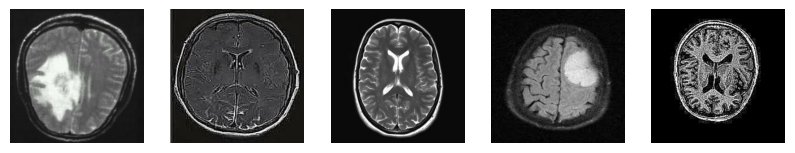

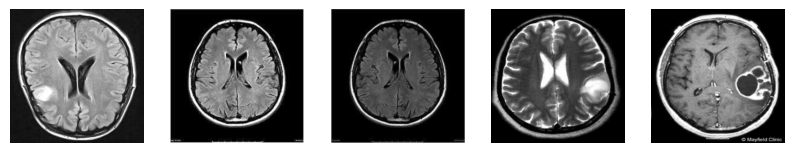

In [ ]:
# For train_dataset
images, labels = next(iter(train_dataset))
fig = plt.figure(figsize=(10, 10))
[plt.subplot(1, 5, i + 1).imshow(images[i].numpy().astype("uint8")) for i in range(5)]
[plt.subplot(1, 5, i + 1).axis("off") for i in range(5)]
plt.show()

# For validation_dataset
images, labels = next(iter(validation_dataset))
fig = plt.figure(figsize=(10, 10))
[plt.subplot(1, 5, i + 1).imshow(images[i].numpy().astype("uint8")) for i in range(5)]
[plt.subplot(1, 5, i + 1).axis("off") for i in range(5)]
plt.show()

## **Build the models**

In this section you will build the model with two approaches.
First you should build it with the Sequential API and then you have to work with the Functional API in the second part.

You can use the below link to know more about these two APIs.

Keep the architecture as simple as possible.

https://medium.com/analytics-vidhya/keras-model-sequential-api-vs-functional-api-fc1439a6fb10

## **1.Sequential API**

### **Build a model**

In [ ]:
"""
This code defines a Sequential model in Keras with three convolutional layers, each followed by a max pooling layer,
a flattening layer, and a dense output layer. It then prints the summary of the model.
"""

seq_model = Sequential([
    Conv2D(8, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(256, 256, 3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(16, kernel_size=(2, 2), activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(32, kernel_size=(2, 2), activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(2, activation='sigmoid')
])


seq_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 128, 128, 8)       0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 127, 127, 16)      528       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 63, 63, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 62, 62, 32)        2080      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 31, 31, 32)       

### **Train the model**

In [ ]:
"""
This code compiles the Sequential model with a specific learning rate and binary cross-entropy as the loss function.
It then trains the model on the training dataset for 10 epochs, using the validation dataset for validation,
and stores the training history.
"""

learning_rate = 0.002

# Compile the model with the learning rate
seq_model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

history = seq_model.fit(train_dataset, validation_data=validation_dataset, epochs=10)

Epoch 1/10
75/75 [==============================] - 49s 66ms/step - loss: 10.2729 - accuracy: 0.7942 - val_loss: 0.2634 - val_accuracy: 0.9117
Epoch 2/10
75/75 [==============================] - 6s 73ms/step - loss: 0.1671 - accuracy: 0.9458 - val_loss: 0.1710 - val_accuracy: 0.9550
Epoch 3/10
75/75 [==============================] - 5s 59ms/step - loss: 0.0635 - accuracy: 0.9842 - val_loss: 0.1853 - val_accuracy: 0.9567
Epoch 4/10
75/75 [==============================] - 7s 94ms/step - loss: 0.0273 - accuracy: 0.9933 - val_loss: 0.1847 - val_accuracy: 0.9667
Epoch 5/10
75/75 [==============================] - 5s 59ms/step - loss: 0.0370 - accuracy: 0.9887 - val_loss: 0.1597 - val_accuracy: 0.9717
Epoch 6/10
75/75 [==============================] - 5s 63ms/step - loss: 0.0122 - accuracy: 0.9971 - val_loss: 0.1962 - val_accuracy: 0.9733
Epoch 7/10
75/75 [==============================] - 6s 74ms/step - loss: 0.0047 - accuracy: 0.9996 - val_loss: 0.1788 - val_accuracy: 0.9750
Epoch 8/10


### **Test the model**

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = seq_model.evaluate(validation_dataset)

print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")


19/19 [==============================] - 1s 35ms/step - loss: 0.1917 - accuracy: 0.9733
Test loss: 0.19167155027389526
Test accuracy: 0.9733333587646484


### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

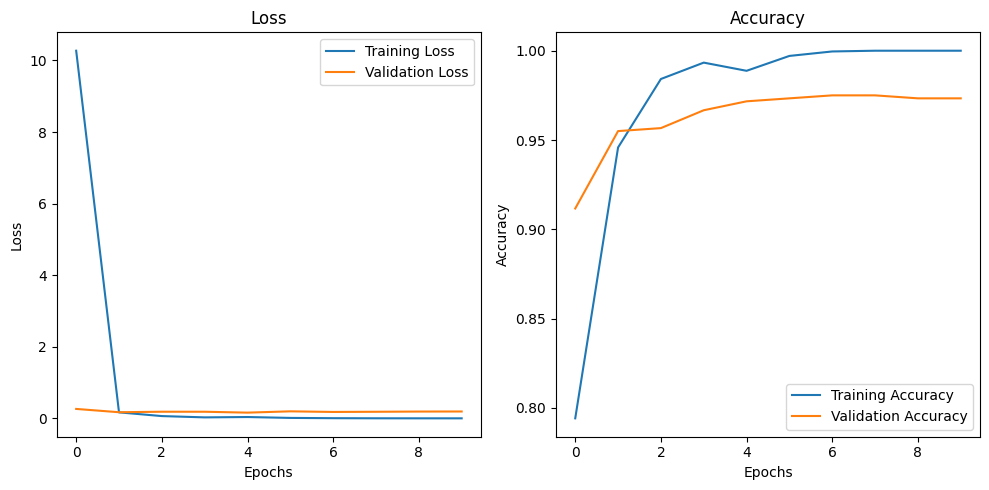

In [ ]:
# Plotting Loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## **2.Functional API**

### **Build a model**

In [ ]:
inputs = Input(shape=(256, 256, 3))

x = Conv2D(8, kernel_size=(3, 3), padding='same', activation='relu')(inputs)
x = MaxPool2D(pool_size=(2, 2), strides=2)(x)
x = Conv2D(16, kernel_size=(2, 2), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2), strides=2)(x)
x = Conv2D(32, kernel_size=(2, 2), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2), strides=2)(x)
x = Flatten()(x)
outputs = Dense(2, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 128, 128, 8)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 127, 127, 16)      528       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 62, 62, 32)        2080

### **Train the model**

In [ ]:
learning_rate = 0.002

# Compile the model with the learning rate
model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

history = model.fit(train_dataset, validation_data=validation_dataset, epochs=10)

Epoch 1/10
75/75 [==============================] - 17s 66ms/step - loss: 6.1974 - accuracy: 0.7688 - val_loss: 0.3298 - val_accuracy: 0.8683
Epoch 2/10
75/75 [==============================] - 6s 82ms/step - loss: 0.1779 - accuracy: 0.9388 - val_loss: 0.2000 - val_accuracy: 0.9283
Epoch 3/10
75/75 [==============================] - 5s 65ms/step - loss: 0.0548 - accuracy: 0.9858 - val_loss: 0.1719 - val_accuracy: 0.9517
Epoch 4/10
75/75 [==============================] - 5s 65ms/step - loss: 0.0171 - accuracy: 0.9979 - val_loss: 0.1781 - val_accuracy: 0.9500
Epoch 5/10
75/75 [==============================] - 6s 75ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.1881 - val_accuracy: 0.9500
Epoch 6/10
75/75 [==============================] - 5s 61ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.1928 - val_accuracy: 0.9450
Epoch 7/10
75/75 [==============================] - 6s 80ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.1995 - val_accuracy: 0.9483
Epoch 8/10
7

### **Test the model**

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(validation_dataset)

print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")


19/19 [==============================] - 1s 37ms/step - loss: 0.2098 - accuracy: 0.9533
Test loss: 0.20980709791183472
Test accuracy: 0.95333331823349


### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

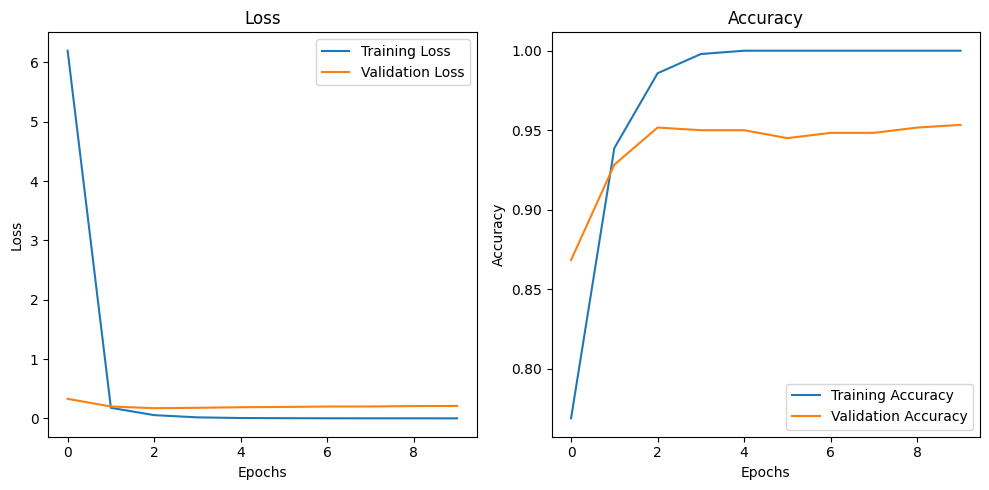

In [ ]:
# Plotting Loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()